In [1]:
import matplotlib.pyplot as plt

from bindsnet import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
n_input = 25
n_output = 25
time = 1000

In [3]:
net = Network()

X = Input(n_input)
Y = CurrentLIFNodes(n_output)
C = Connection(X, Y, w=0.1 * torch.rand(n_input, n_output))

net.add_layer(X, 'X')
net.add_layer(Y, 'Y')
net.add_connection(C, 'X', 'Y')

M_1 = Monitor(X, state_vars=['s'])
M_2 = Monitor(Y, state_vars=['s', 'v', 'i'])

net.add_monitor(M_1, 'X')
net.add_monitor(M_2, 'Y')

In [4]:
x = torch.bernoulli(0.25 * torch.rand(time, n_input))

In [5]:
net.run(x = {'X' : x}, time=time)

In [6]:
X_s, Y_s, Y_v = M_1.get('s'), M_2.get('s'), M_2.get('v')

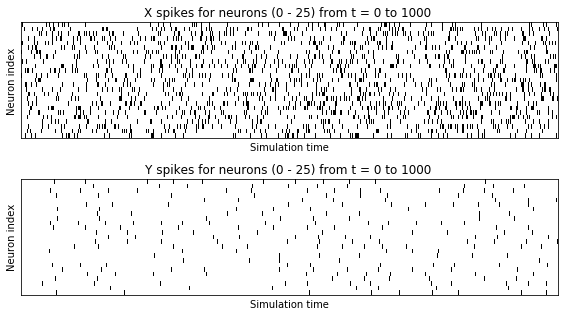

In [7]:
plot_spikes({'X' : X_s, 'Y' : Y_s});

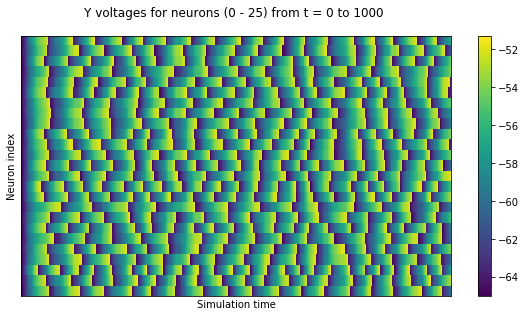

In [8]:
ims, _ = plot_voltages({'Y' : Y_v})
plt.colorbar(ims[0]);

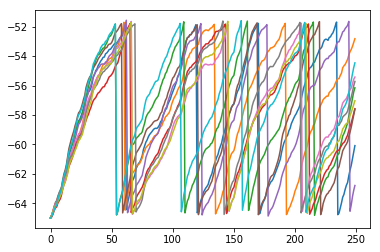

In [12]:
plt.plot(Y_v.numpy()[:10, :250].T);

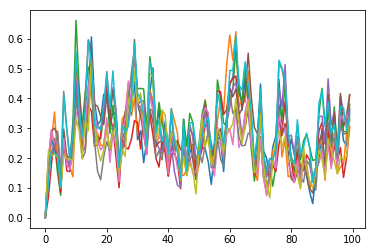

In [13]:
Y_i = M_2.get('i')
plt.plot(Y_i.numpy()[:10, :100].T);